# Changing $n$ and $p$

The binomial has two parameters, $n$ and $p$, which together determine the probability of obtaining $k$ hits:

$$ k \sim \mathcal{B}(n,p) $$

What happens to the frequency of each value of k, if we change the probability of a hit $p$, or the number of trials $n$?


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## $p$, probability of a hit

Think back to our home-baked code to generate a random number with a probability $p$ of being a hit:

In [2]:
# check if it is less than p - this should happen on a proportion of trials equal to p
x = np.random.uniform(0,1)
p=0.5
if x>p:
    hit = 1
else:
    hit = 0
print(x)
print('is it a hit?:            ' + str(hit))

0.7291615487106345
is it a hit?:            1


If we change the value of $p$, this changes the proportion of our random $x$'s for which $x<p$ is true. Thhe histograms below show the values of 10,000 outputs from `np.random.uniform()`, with those that match the criterion `x<p` highlighted in red

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/Chp7_pvsx.png" width="95%"  />

* can you see why we used $x<p$ as a 'hit', rather than $x>p$?

### Distribution of $k$ depends on $p$

But how does changing $p$ affect the values of $k$ we see, when $k$ is the *number of hits* out of $n$ trials ($n$ coin tosses etc)?

Here is the code for the simulation again, now with $n$ and $p$ coded as variables rather than *hard coded* as 10 and 0.5


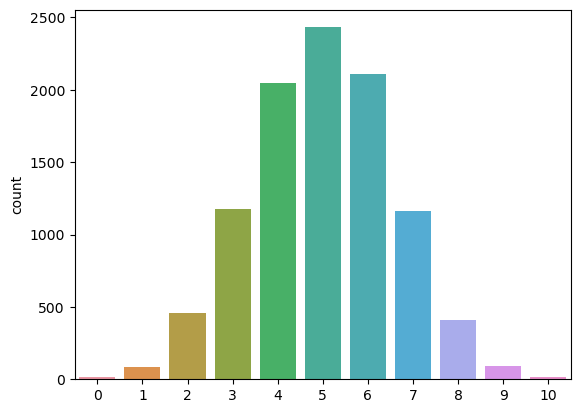

In [3]:
n=10
p=0.5
nReps = 10000

k = np.random.binomial(n,p, size=nReps)
    
sns.countplot(x=k) 
plt.show()

What if we change $p$ to be 0.7 instead?

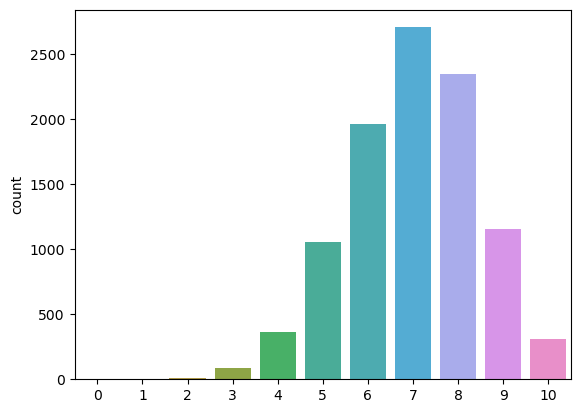

In [4]:
n=10
p=0.7
nReps = 10000

k = np.random.binomial(n,p, size=nReps)
    
sns.countplot(x=k, order=range(n+1)) 
# the argument 'order' is doing a similar job to 'bins' in a histogram
# here I am forcing sns to plot all the possible values of k from 0 to 10, 
# even though some of them didn't occur in the simulation
plt.show()

You should notice after modifying the simulation so that $p=0.7$:
* the most common value for k is 7, ie 7/10 hits.
* The distribution gets skewed, as we can't have more than 10/10 hits

Try some other values of $p$ to get a sense for how changing $p$ affects the distribution of $k$.

## Mean of $k$

The *expected value* of $k$, ie the mean of $k$ over many repetitions, is given by

$$ E(k) = np $$

In the following code block, we generate 10000 random samples from the binomial distribution $k \sim \mathcal{B}(n,p)$ and find their mean; we compare it to the value of the mean from the equation, $np$.

Hopefully it should match!

In [5]:
n=10
p=0.7
nReps = 10000

k = np.random.binomial(n,p, size=nReps)
    
print('mean(k) = ' + str(k.mean()))
print('np = ' + str(n*p))

mean(k) = 6.9994
np = 7.0


## $n$, number of trials

If we increase the number of trials to 100, what happens to the frequency distribution of $k$?

Here we modify the simulation so that $n=100$:

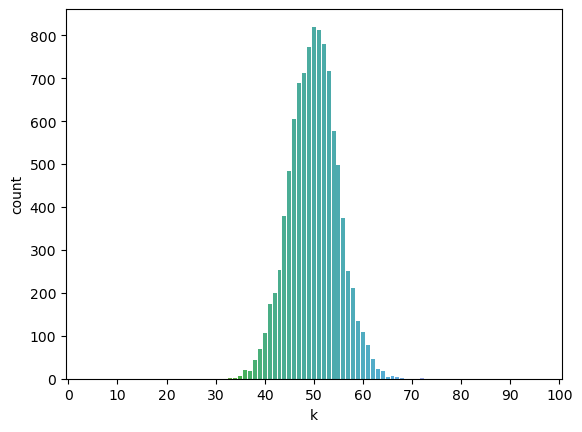

In [6]:
n=100
p=0.5
nReps = 10000

k = np.random.binomial(n,p, size=nReps)
    
sns.countplot(x=k, order=range(n+1)) 
# the argument 'order' is doing a similar job to 'bins' in a histogram
# here I am forcing sns to plot all the possible values of k from 0 to 100, 
# even though some of them didn't occur in the simulation
plt.xlabel('k')
plt.xticks(range(0, n+1, 10));

We can see that the peak of the histogram is where we expect (the most common value of $k$ is 50, $np$) but the spread of the histogram is narrower, compared to the range of possible values for $k$ (0 to $n$) than when $n$ was lower

## Standard deviation of $k$

The standard deviation of $k$ (or its expected standard deviation over many repetitions of 10 coin tosses) is given by

$$ std(k) = \sqrt{npq} $$

... where $q = (1-p)$

In the following code block, we generate 10000 random samples from the binomial distribution $k \sim \mathcal{B}(n,p)$ and find their standard deviation; we compare it to the expected value of the standard deviation, $\sqrt{npq}$.

Hopefully it should match!

In [7]:
n=100
p=0.5
nReps = 10000

k = np.random.binomial(n,p, size=nReps)
    
print('std(k) = ' + str(k.std()))
print('sqrt(npq) = ' + str((n*p*(1-p))**0.5))

std(k) = 5.011768194958742
sqrt(npq) = 5.0


## Standard deviation of $k/n$

We noted above that that spread of the distribution of $k$, as a proportion of the range of possible values $(0:n)$ decreased as $n$ increased, in other words that the chance of getting a high or low proportion of hits due to chance decreases when $n$ is high (this was discussed in the lecture)

The proportion of hits is $k/n$ and its standard deviation is given by

$$ \frac{\sqrt{pq}}{\sqrt{n}} $$

where $ q = (1-p) $

This has the interesting consequence that <b>for a given value of p, the standard deviation of the proportion of hits is proprtional to $\frac{1}{\sqrt(n)}$ </b>

In other words, as $n$ increases, the proportion of hits I get in a single 'repetition' of the experiment (a single set of 10 coin tosses in our example) conforms more closely to the true value of $p$, the probability of a hit - 

in other words, my estimate of $p$ gets better

but only in proportion to $\sqrt{n}$ 